# Labolatorium 5: Modele segregacji przestrzennej

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Zadanie 1 Model Schellinga

In [4]:
def generate_matrix(L,p):
    shape = (L,L)
    matrix = np.zeros(shape)
    p = 0.5

    for i in range(L):
        for j in range(L):
            occupied = np.random.choice(2, p=[p,1-p])
            if occupied == 0:
                matrix[i][j] = np.random.choice([1,2])
    return matrix

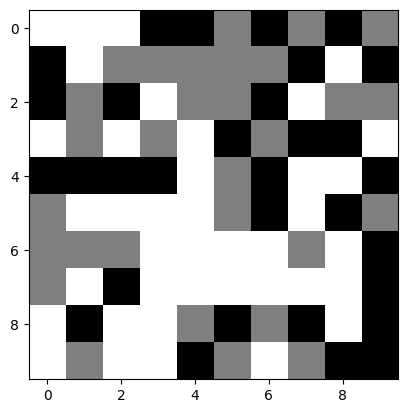

In [5]:
matrix = generate_matrix(10,0.5)

plt.imshow(matrix, cmap='binary', vmin=0, vmax=2, interpolation='nearest')

In [26]:
from collections import defaultdict


def count_neighbors(matrix, x,y):
    L,_ = matrix.shape
    neighbors = 0
    for i in [x-1,x,x+1]:
        for j in [y-1,y,y+1]:
            if not (i == x and j == y):
                if matrix[i%L][j%L] == matrix[x][y]:
                    neighbors += 1
    return neighbors

def find_empty(matrix, x, y):
    L,_ = matrix.shape
    empty = []
    for i in [x-1,x,x+1]:
        for j in [y-1,y,y+1]:
            if not (i == x and j == y):
                if matrix[i%L][j%L] == 0:
                    empty.append((i%L,j%L))
    return empty


def remove_conflicts(moves):
    counts = defaultdict(lambda: 0)
    for dest,_ in moves:
        counts[dest] += 1
    
    moves = dict(moves)
    for dest,count in counts.items():
        if count > 1:
            del moves[dest]
    
    return moves.items()

def evolve(matrix,a):
    L,_ = matrix.shape
    moves = []
    neighbors_sum = 0
    neighbors_n = 0
    for i in range(L):
        for j in range(L):
            neighbors = count_neighbors(matrix,i,j)
            neighbors_sum += neighbors
            neighbors_n += 1
            if neighbors < a:
                empty = find_empty(matrix,i,j)
                n_empty = len(empty)
                if n_empty != 0:
                    move_id = np.random.choice(n_empty)
                    move = empty[move_id]
                    moves.append((move,(i,j)))
    
    moves = remove_conflicts(moves)
    
    for dest,org in moves:
        dx,dy = dest
        ox,oy = org
        matrix[dx][dy],matrix[ox][oy] = matrix[ox][oy],matrix[dx][dy]
    
    return matrix, neighbors_sum/neighbors_n



In [48]:
def run_test(L,p,a):
    fig, axis = plt.subplots(1, 3)
    fig.set_figheight(20)
    fig.set_figwidth(30)
    
    matrix = generate_matrix(L,p)
    mns = []
    axis[0].imshow(matrix, cmap='binary', vmin=0, vmax=2, interpolation='nearest')
    axis[0].set_title('starting state')

    for _ in range(3000):
        matrix, mn = evolve(matrix,a)
        mns.append(mn)

    axis[1].imshow(matrix, cmap='binary', vmin=0, vmax=2, interpolation='nearest')
    axis[1].set_title('final state')
    axis[2].scatter(range(3000),mns)
    axis[2].set_title('mean number of neighbors')

In [46]:
test_cases = [(L,p,4) for L in [20,100,400] for p in [0.35,0.45,0.55,0.65]]

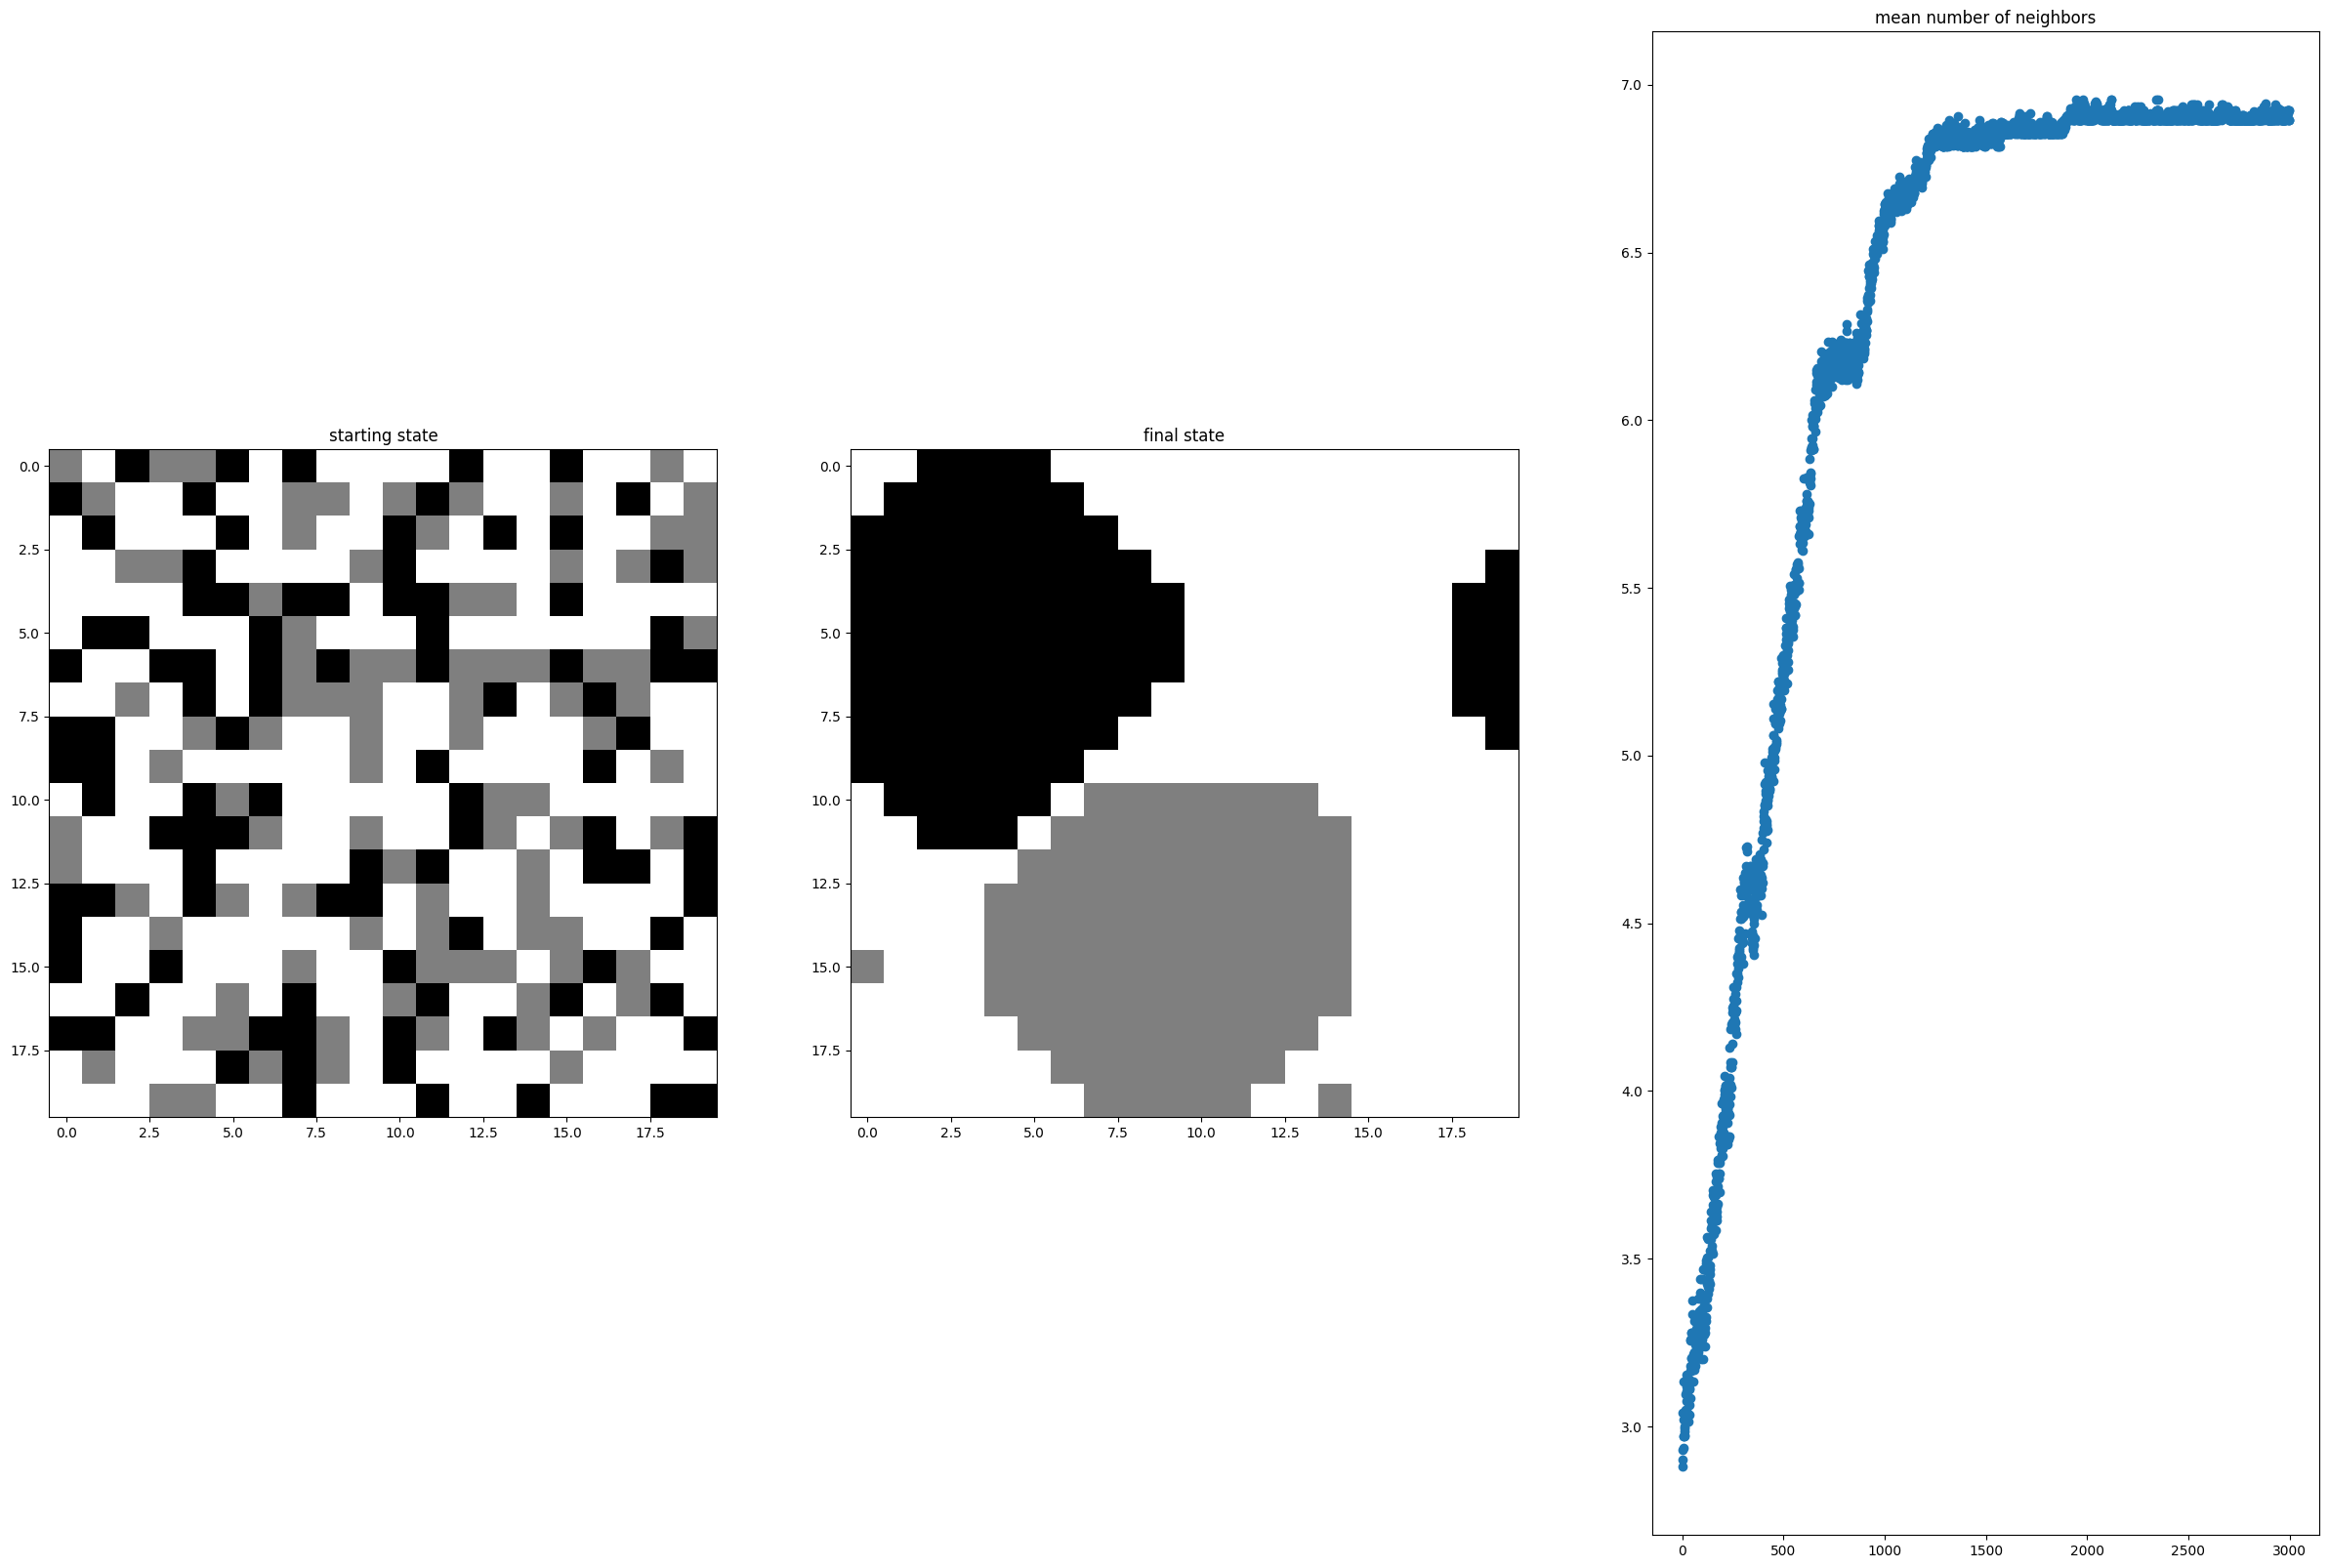

In [49]:
run_test(*test_cases[0])

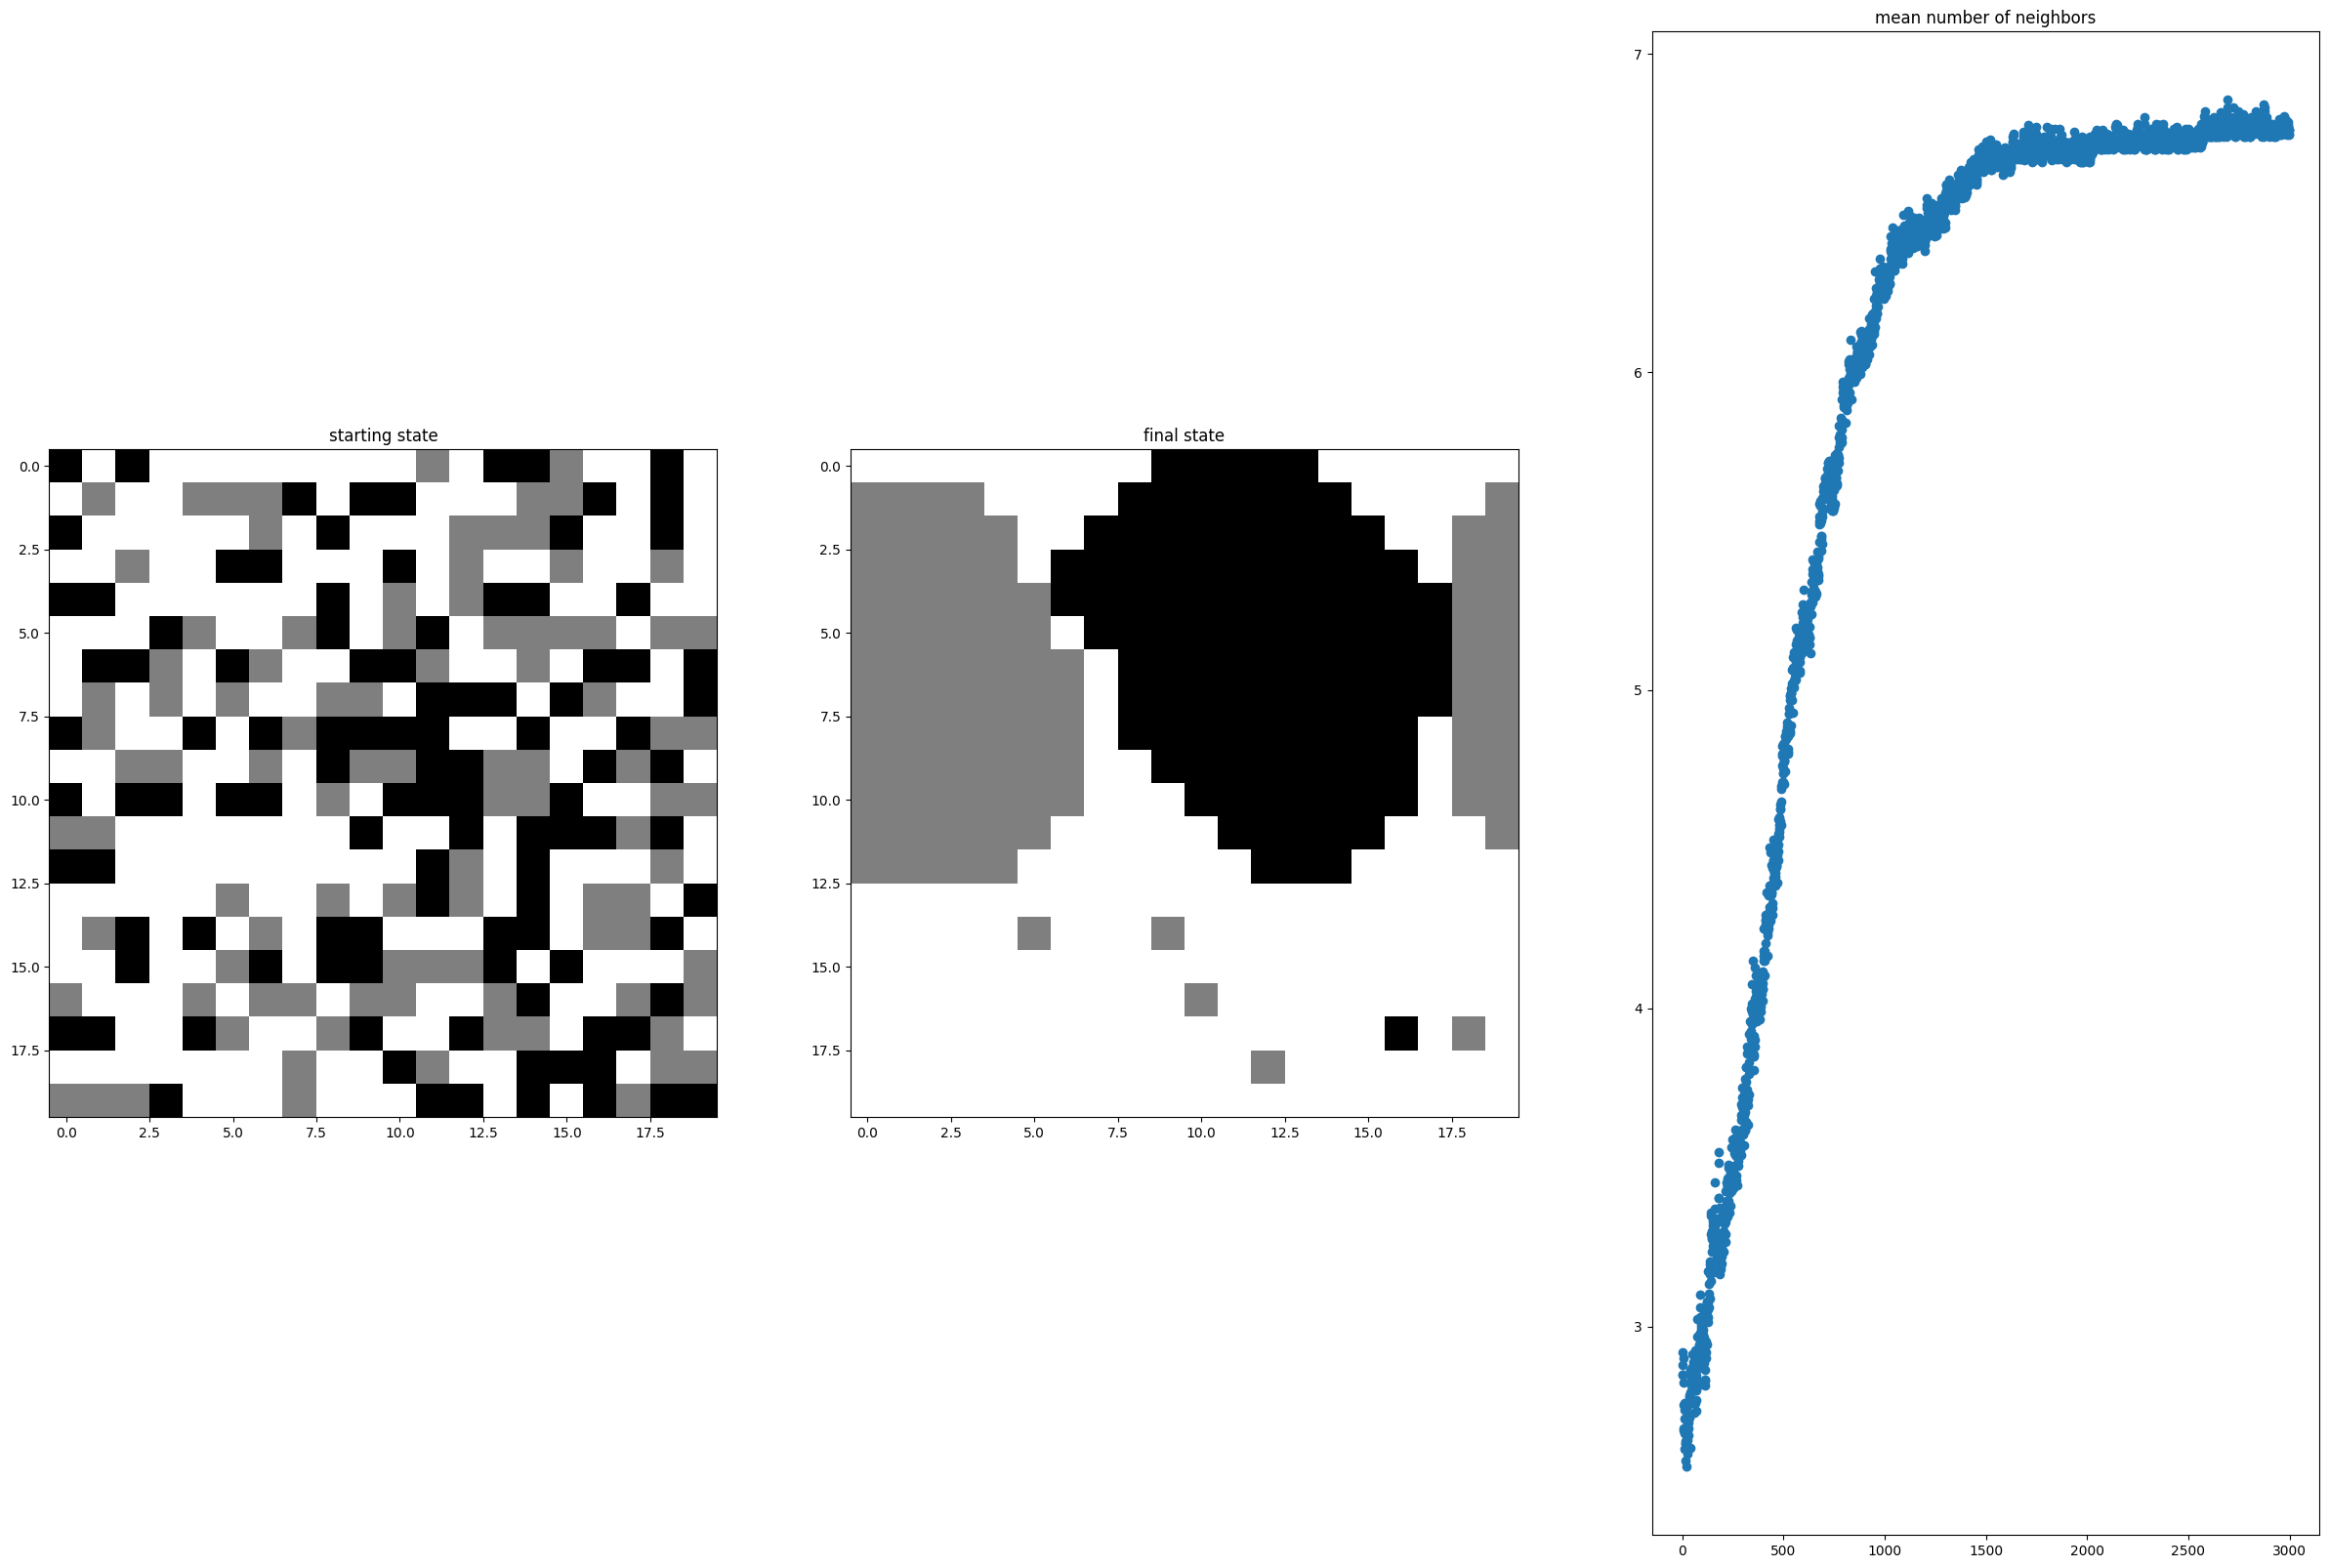

In [50]:
run_test(*test_cases[1])

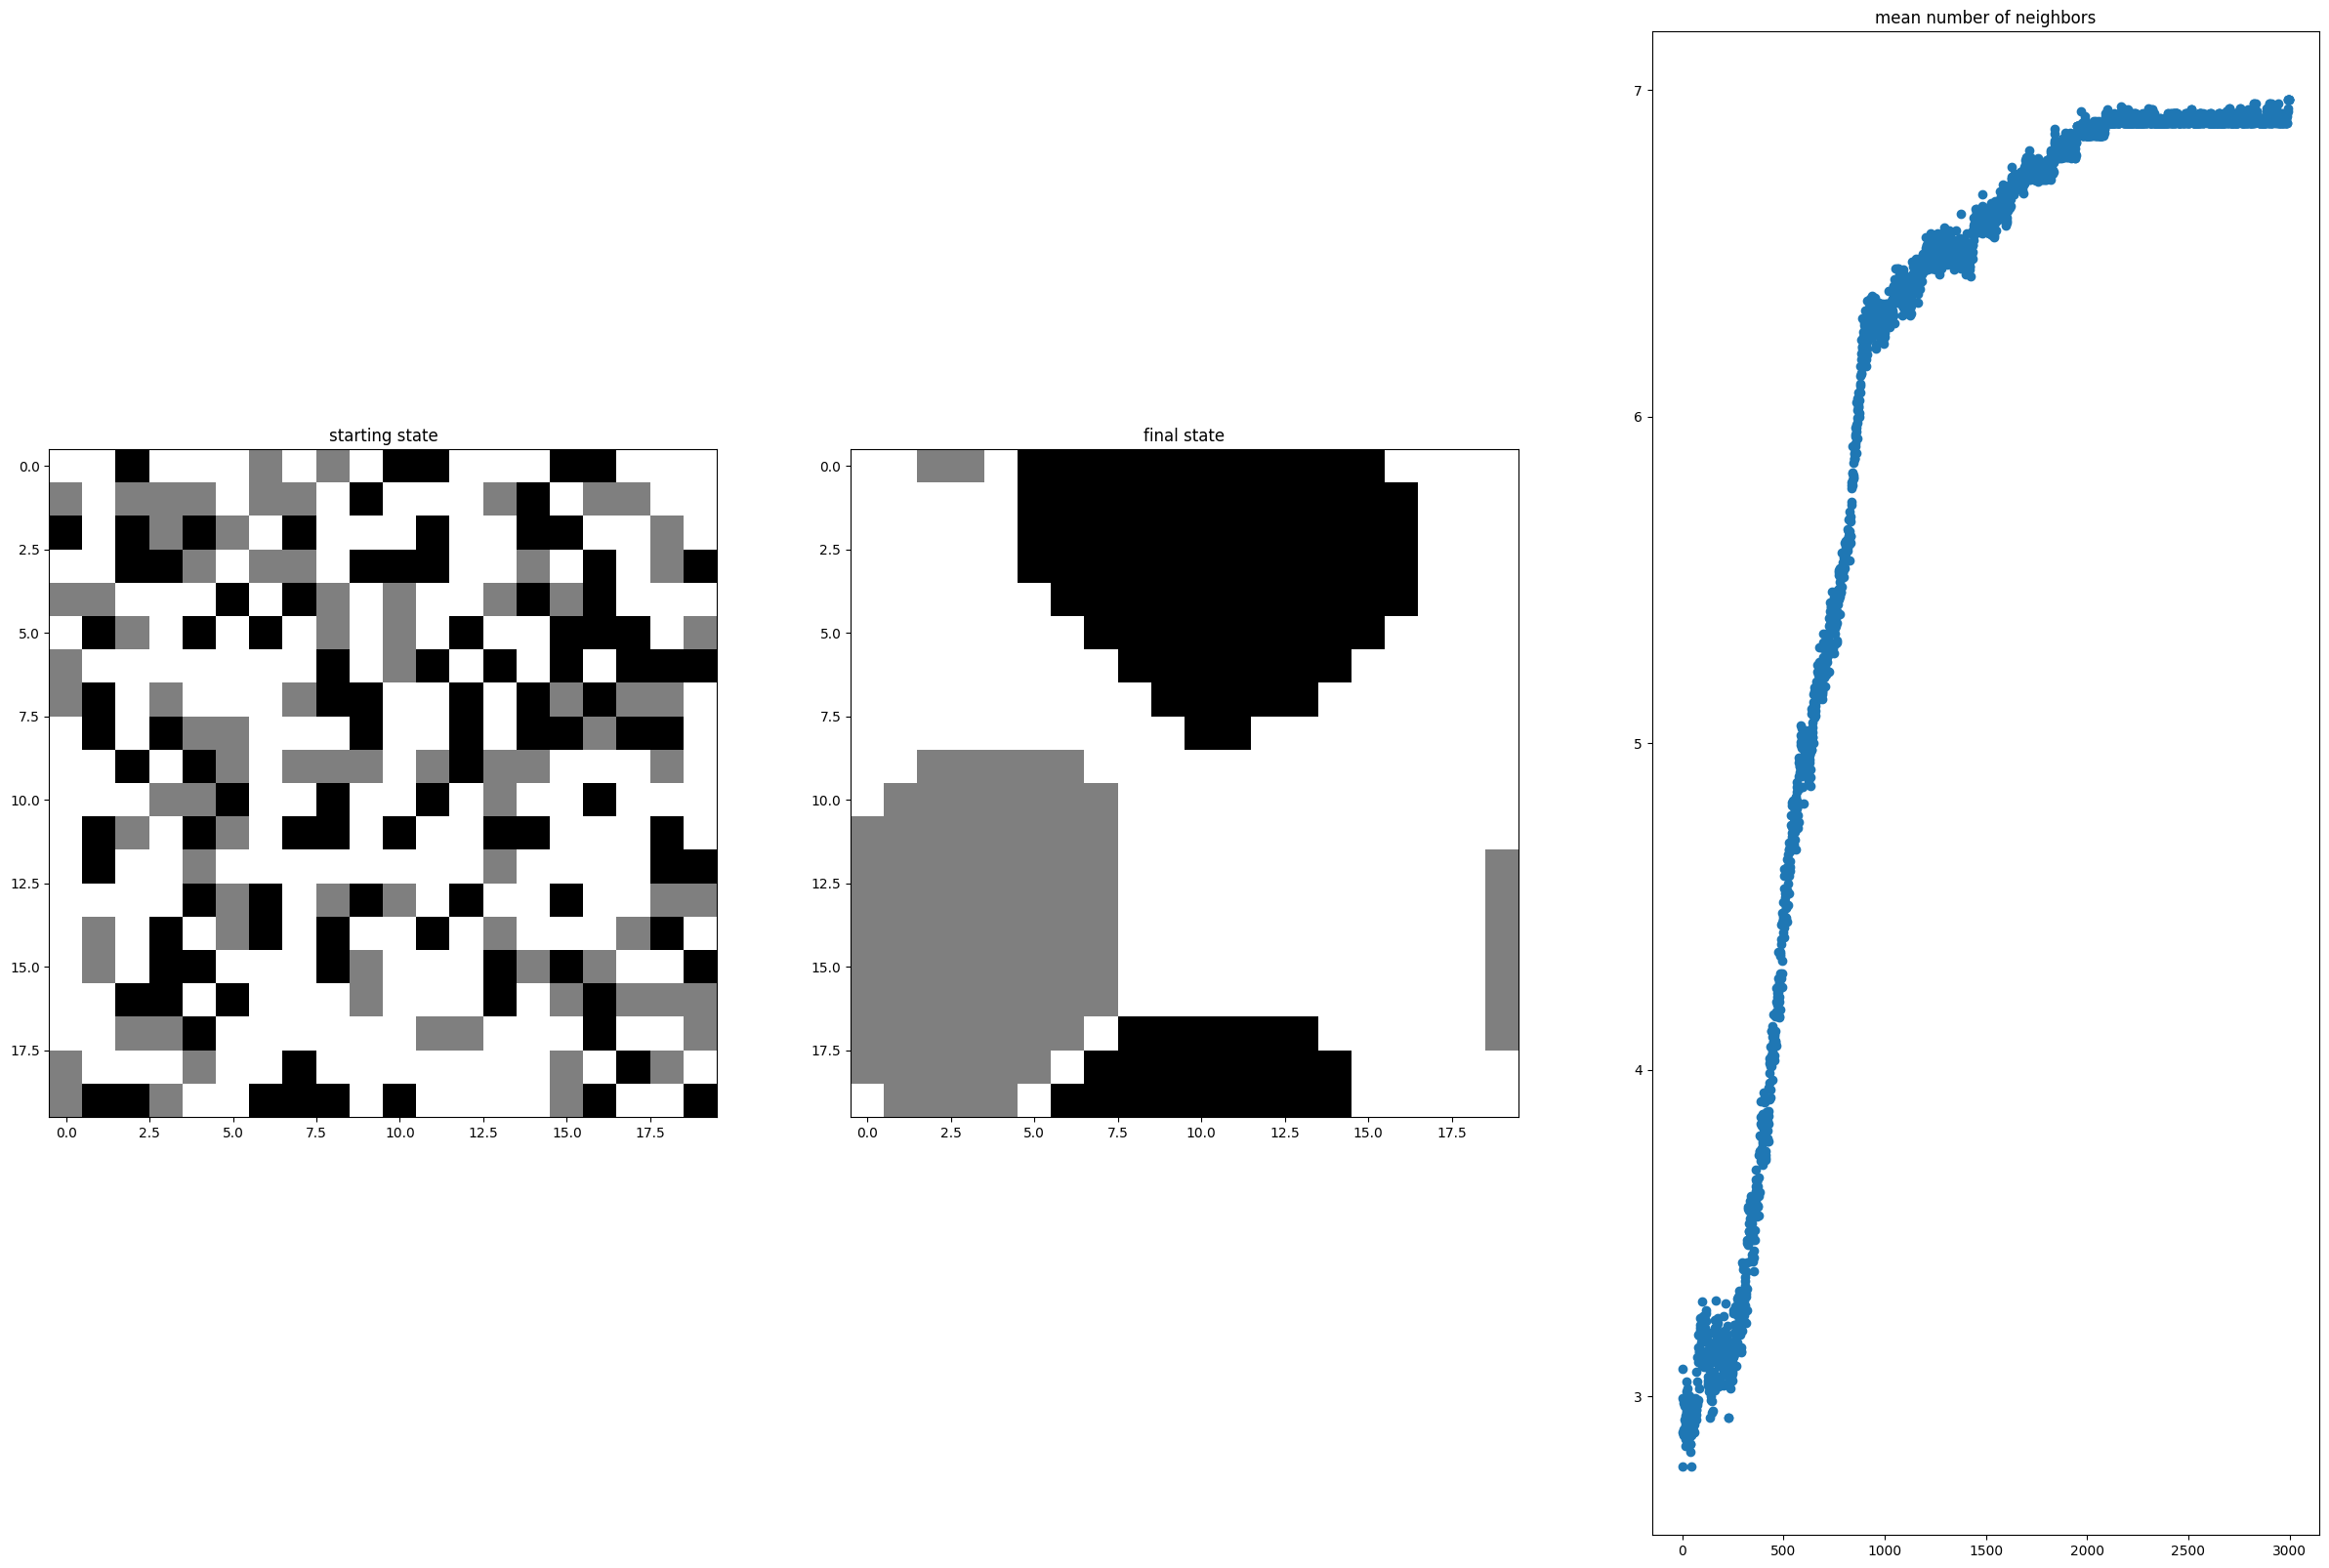

In [51]:
run_test(*test_cases[2])

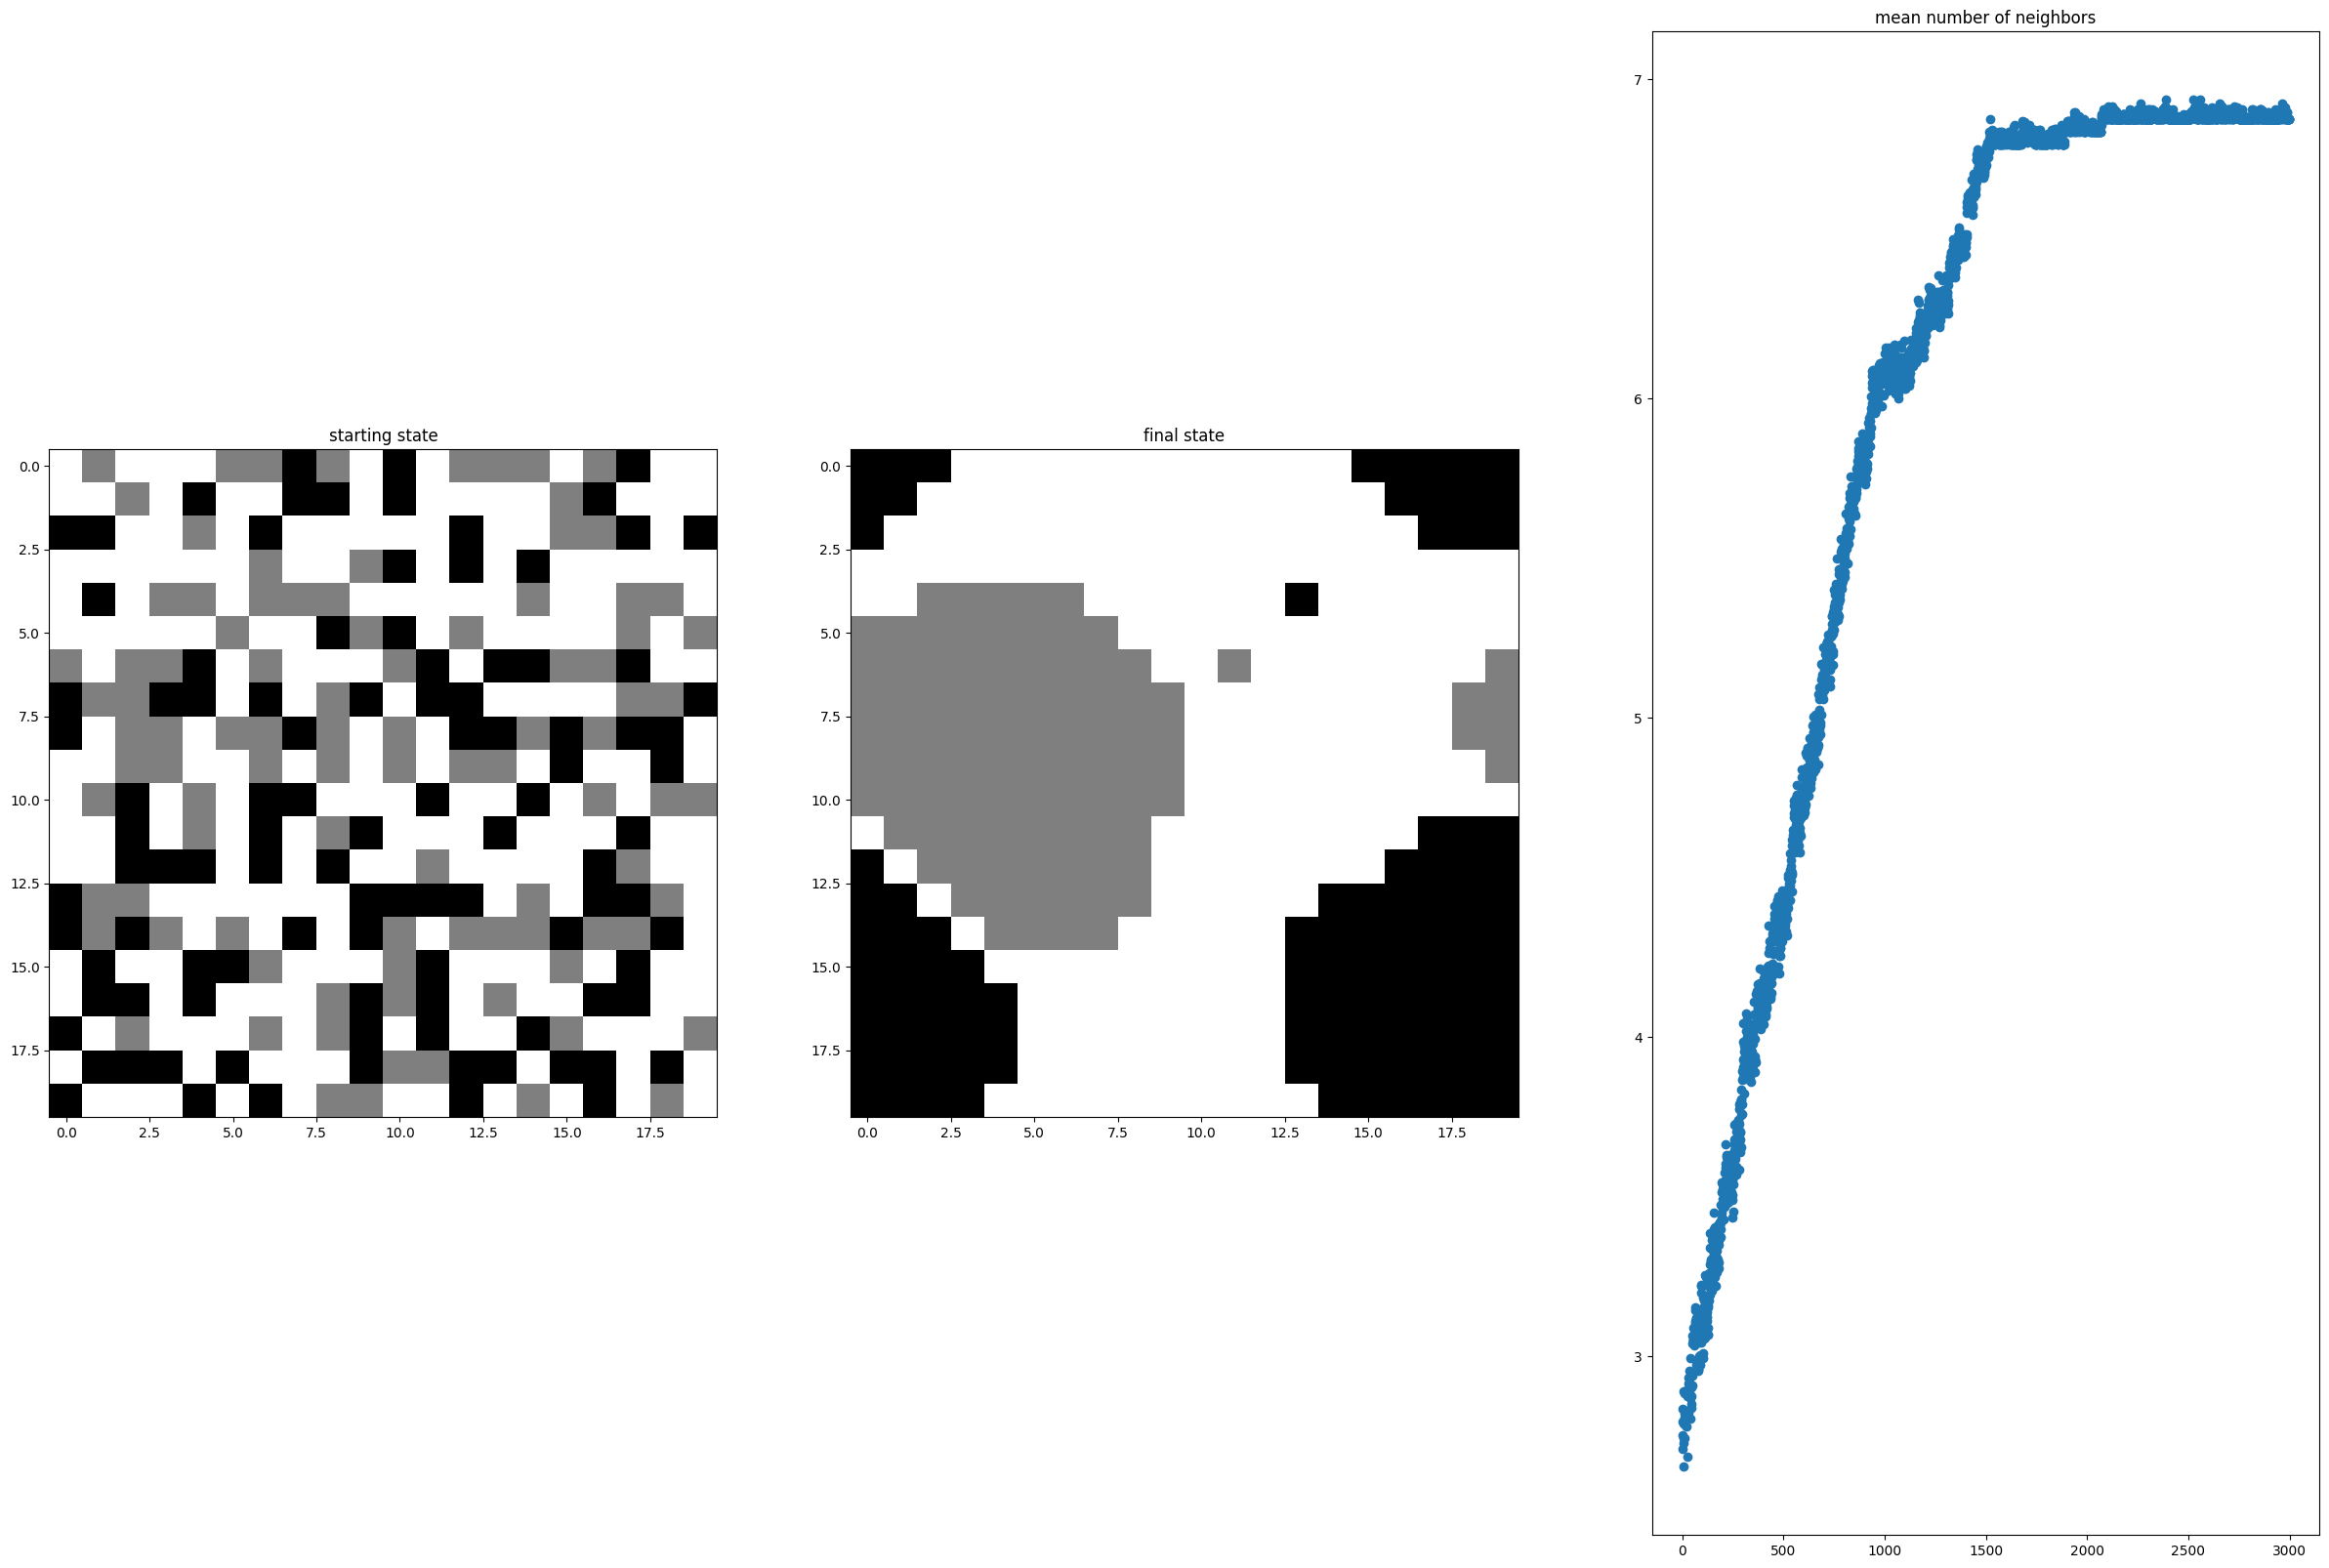

In [52]:
run_test(*test_cases[3])

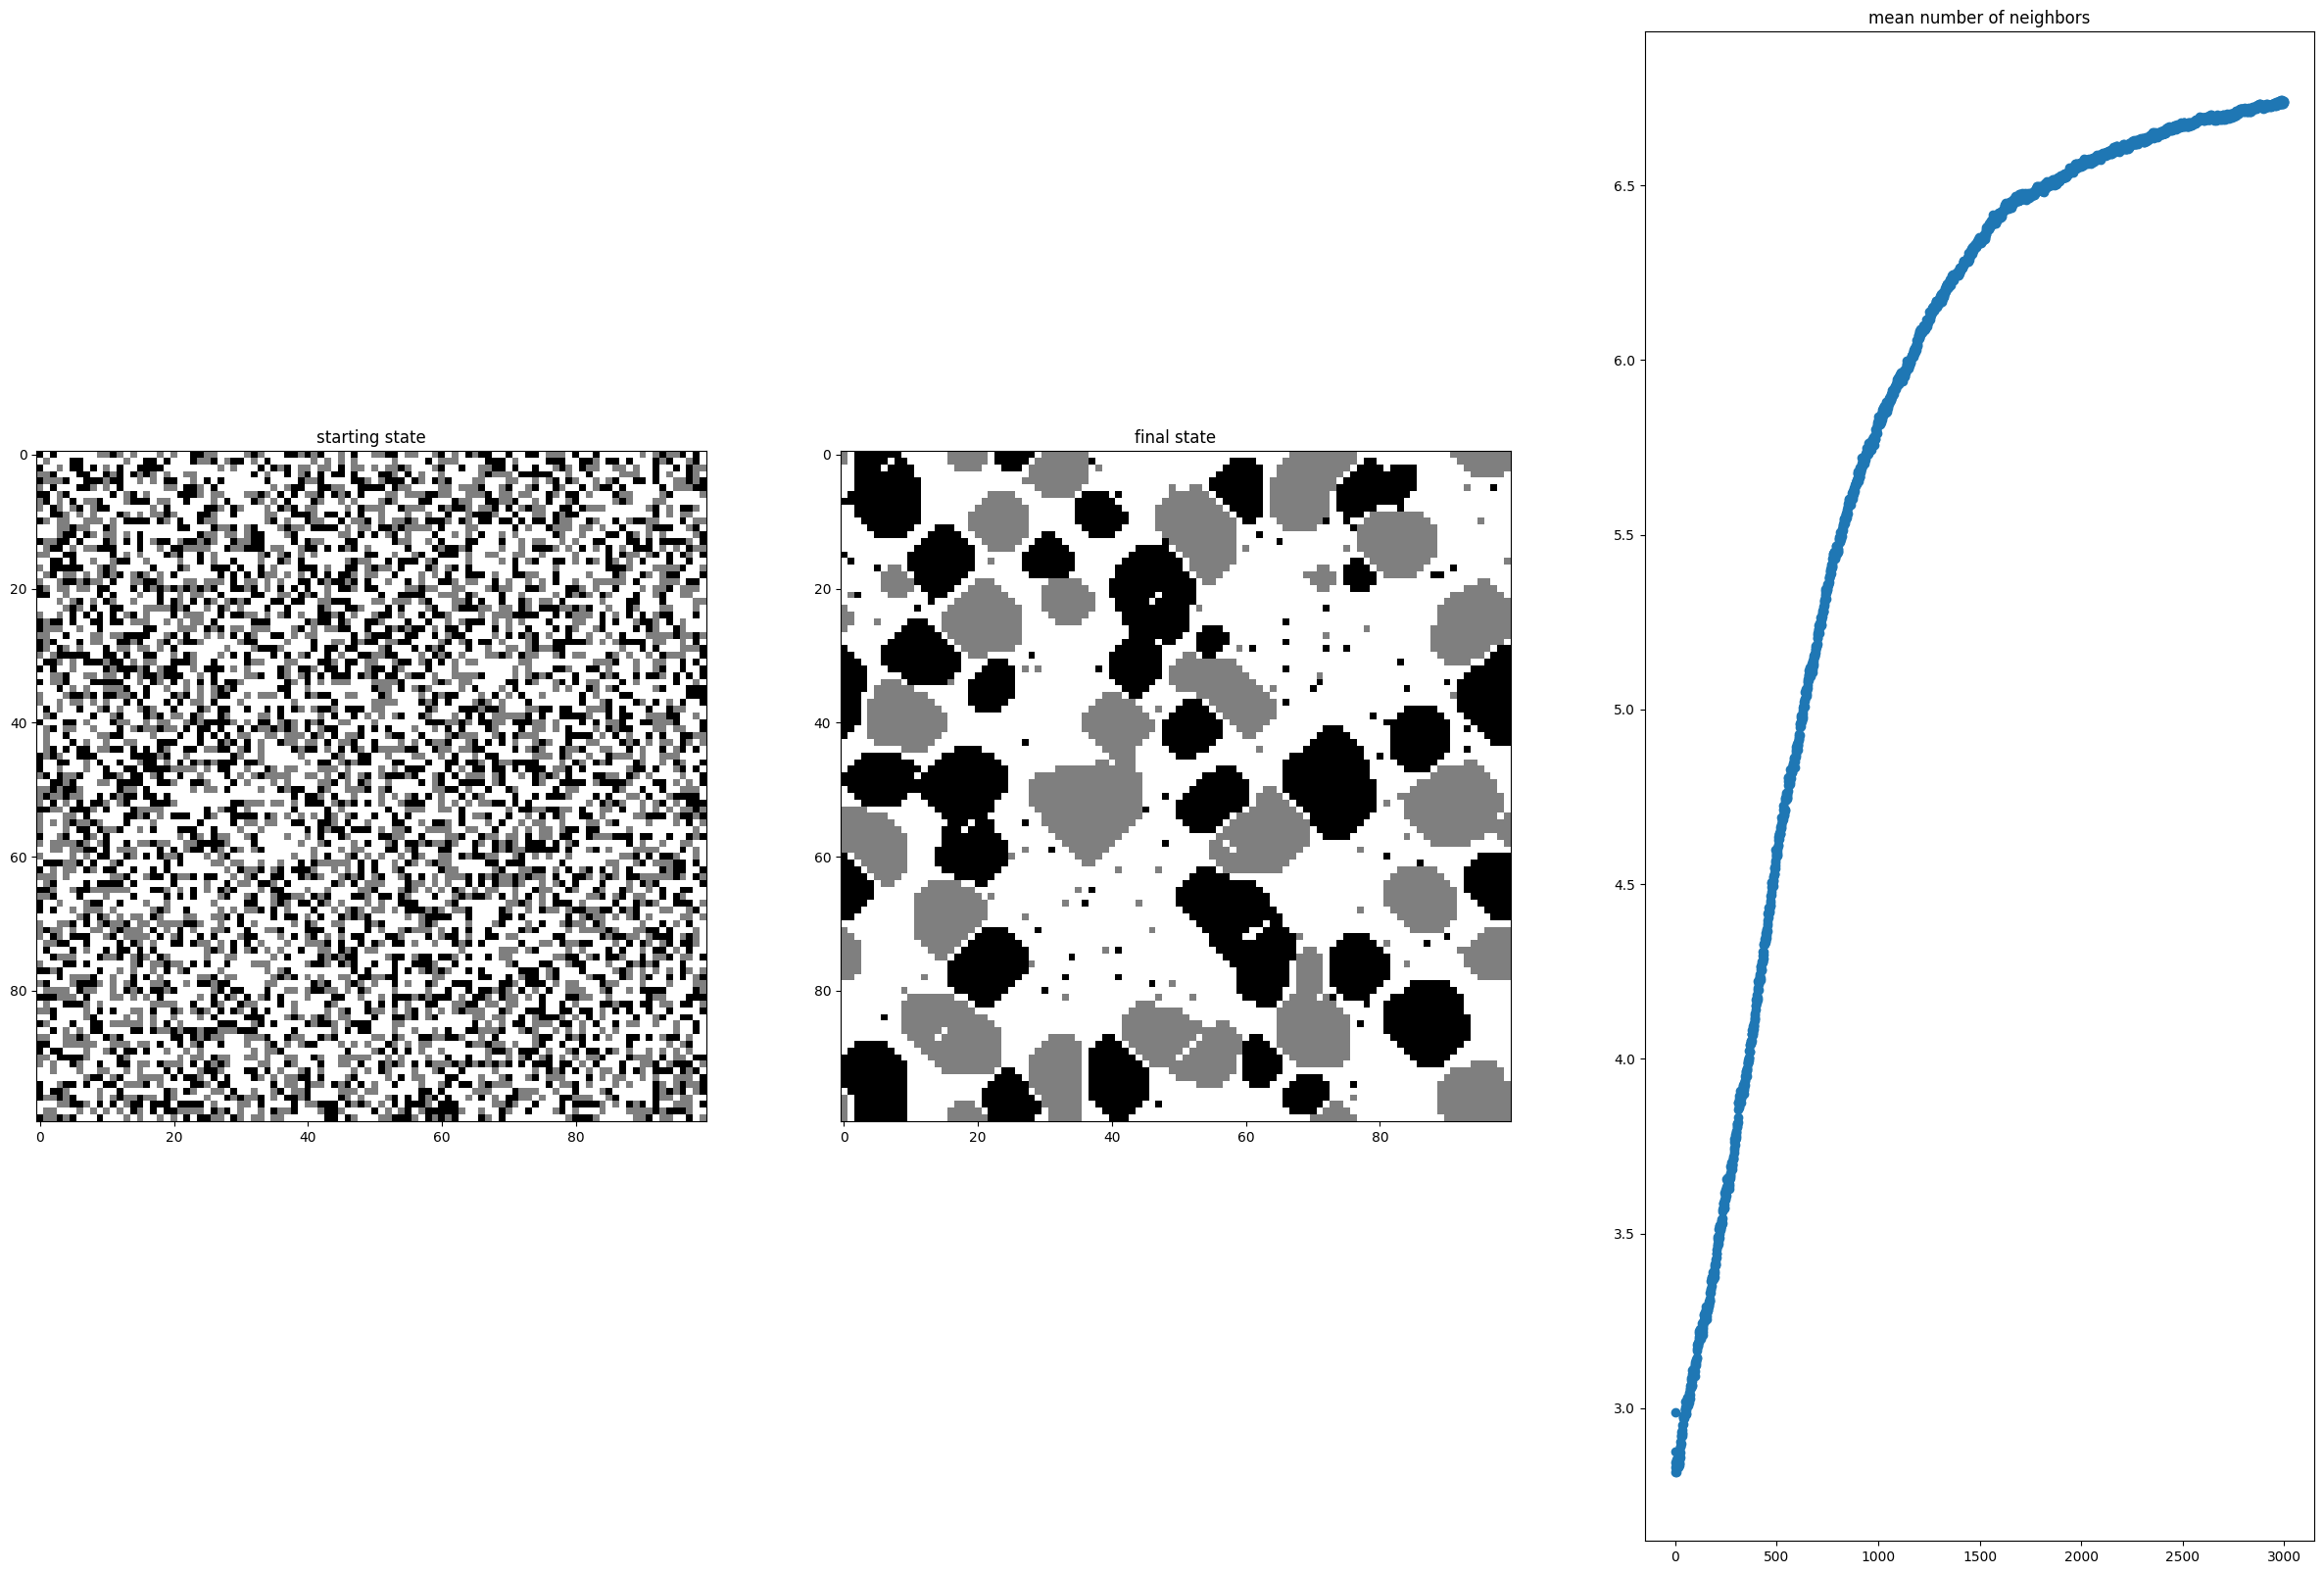

In [53]:
run_test(*test_cases[4])

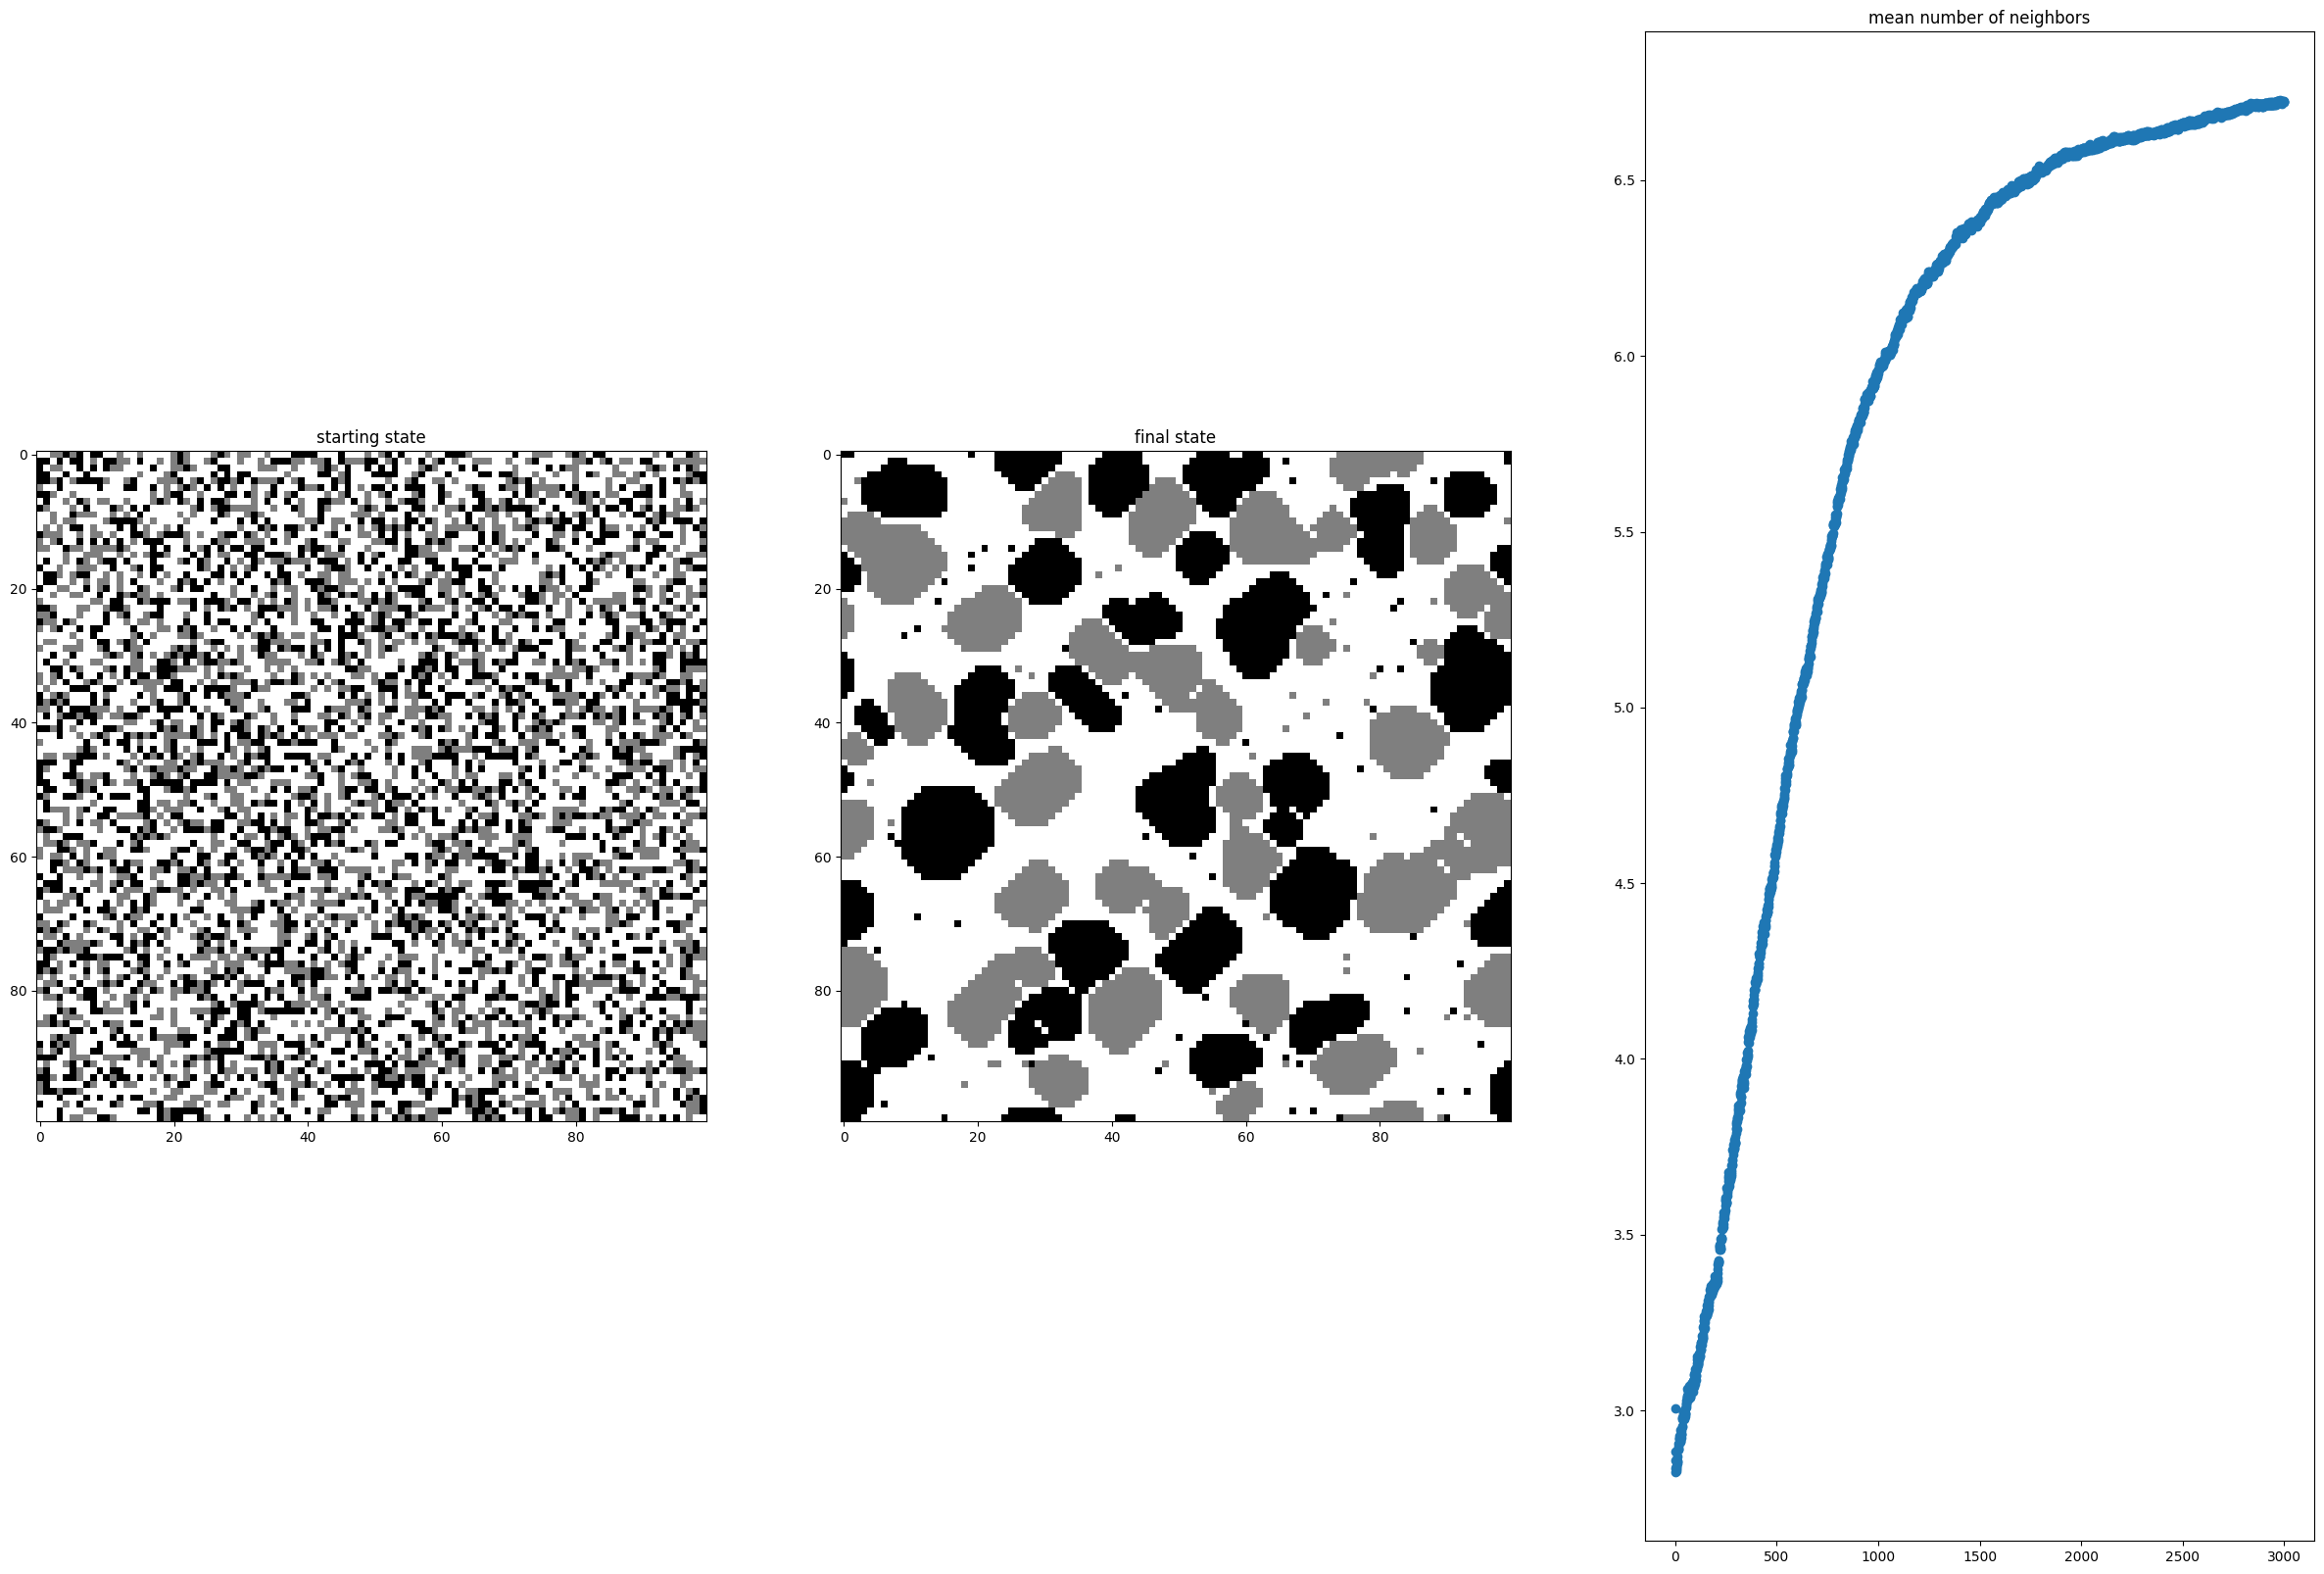

In [54]:
run_test(*test_cases[5])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/pkopel/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_1421723/1525151126.py", line 1, in <module>
    run_test(*test_cases[6])
  File "/tmp/ipykernel_1421723/228127828.py", line 12, in run_test
    matrix, mn = evolve(matrix,a)
  File "/tmp/ipykernel_1421723/3059432335.py", line 44, in evolve
    neighbors = count_neighbors(matrix,i,j)
  File "/tmp/ipykernel_1421723/3059432335.py", line -1, in count_neighbors
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/pkopel/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 1997, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/pkopel/.local/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1112, in structured_traceback
  

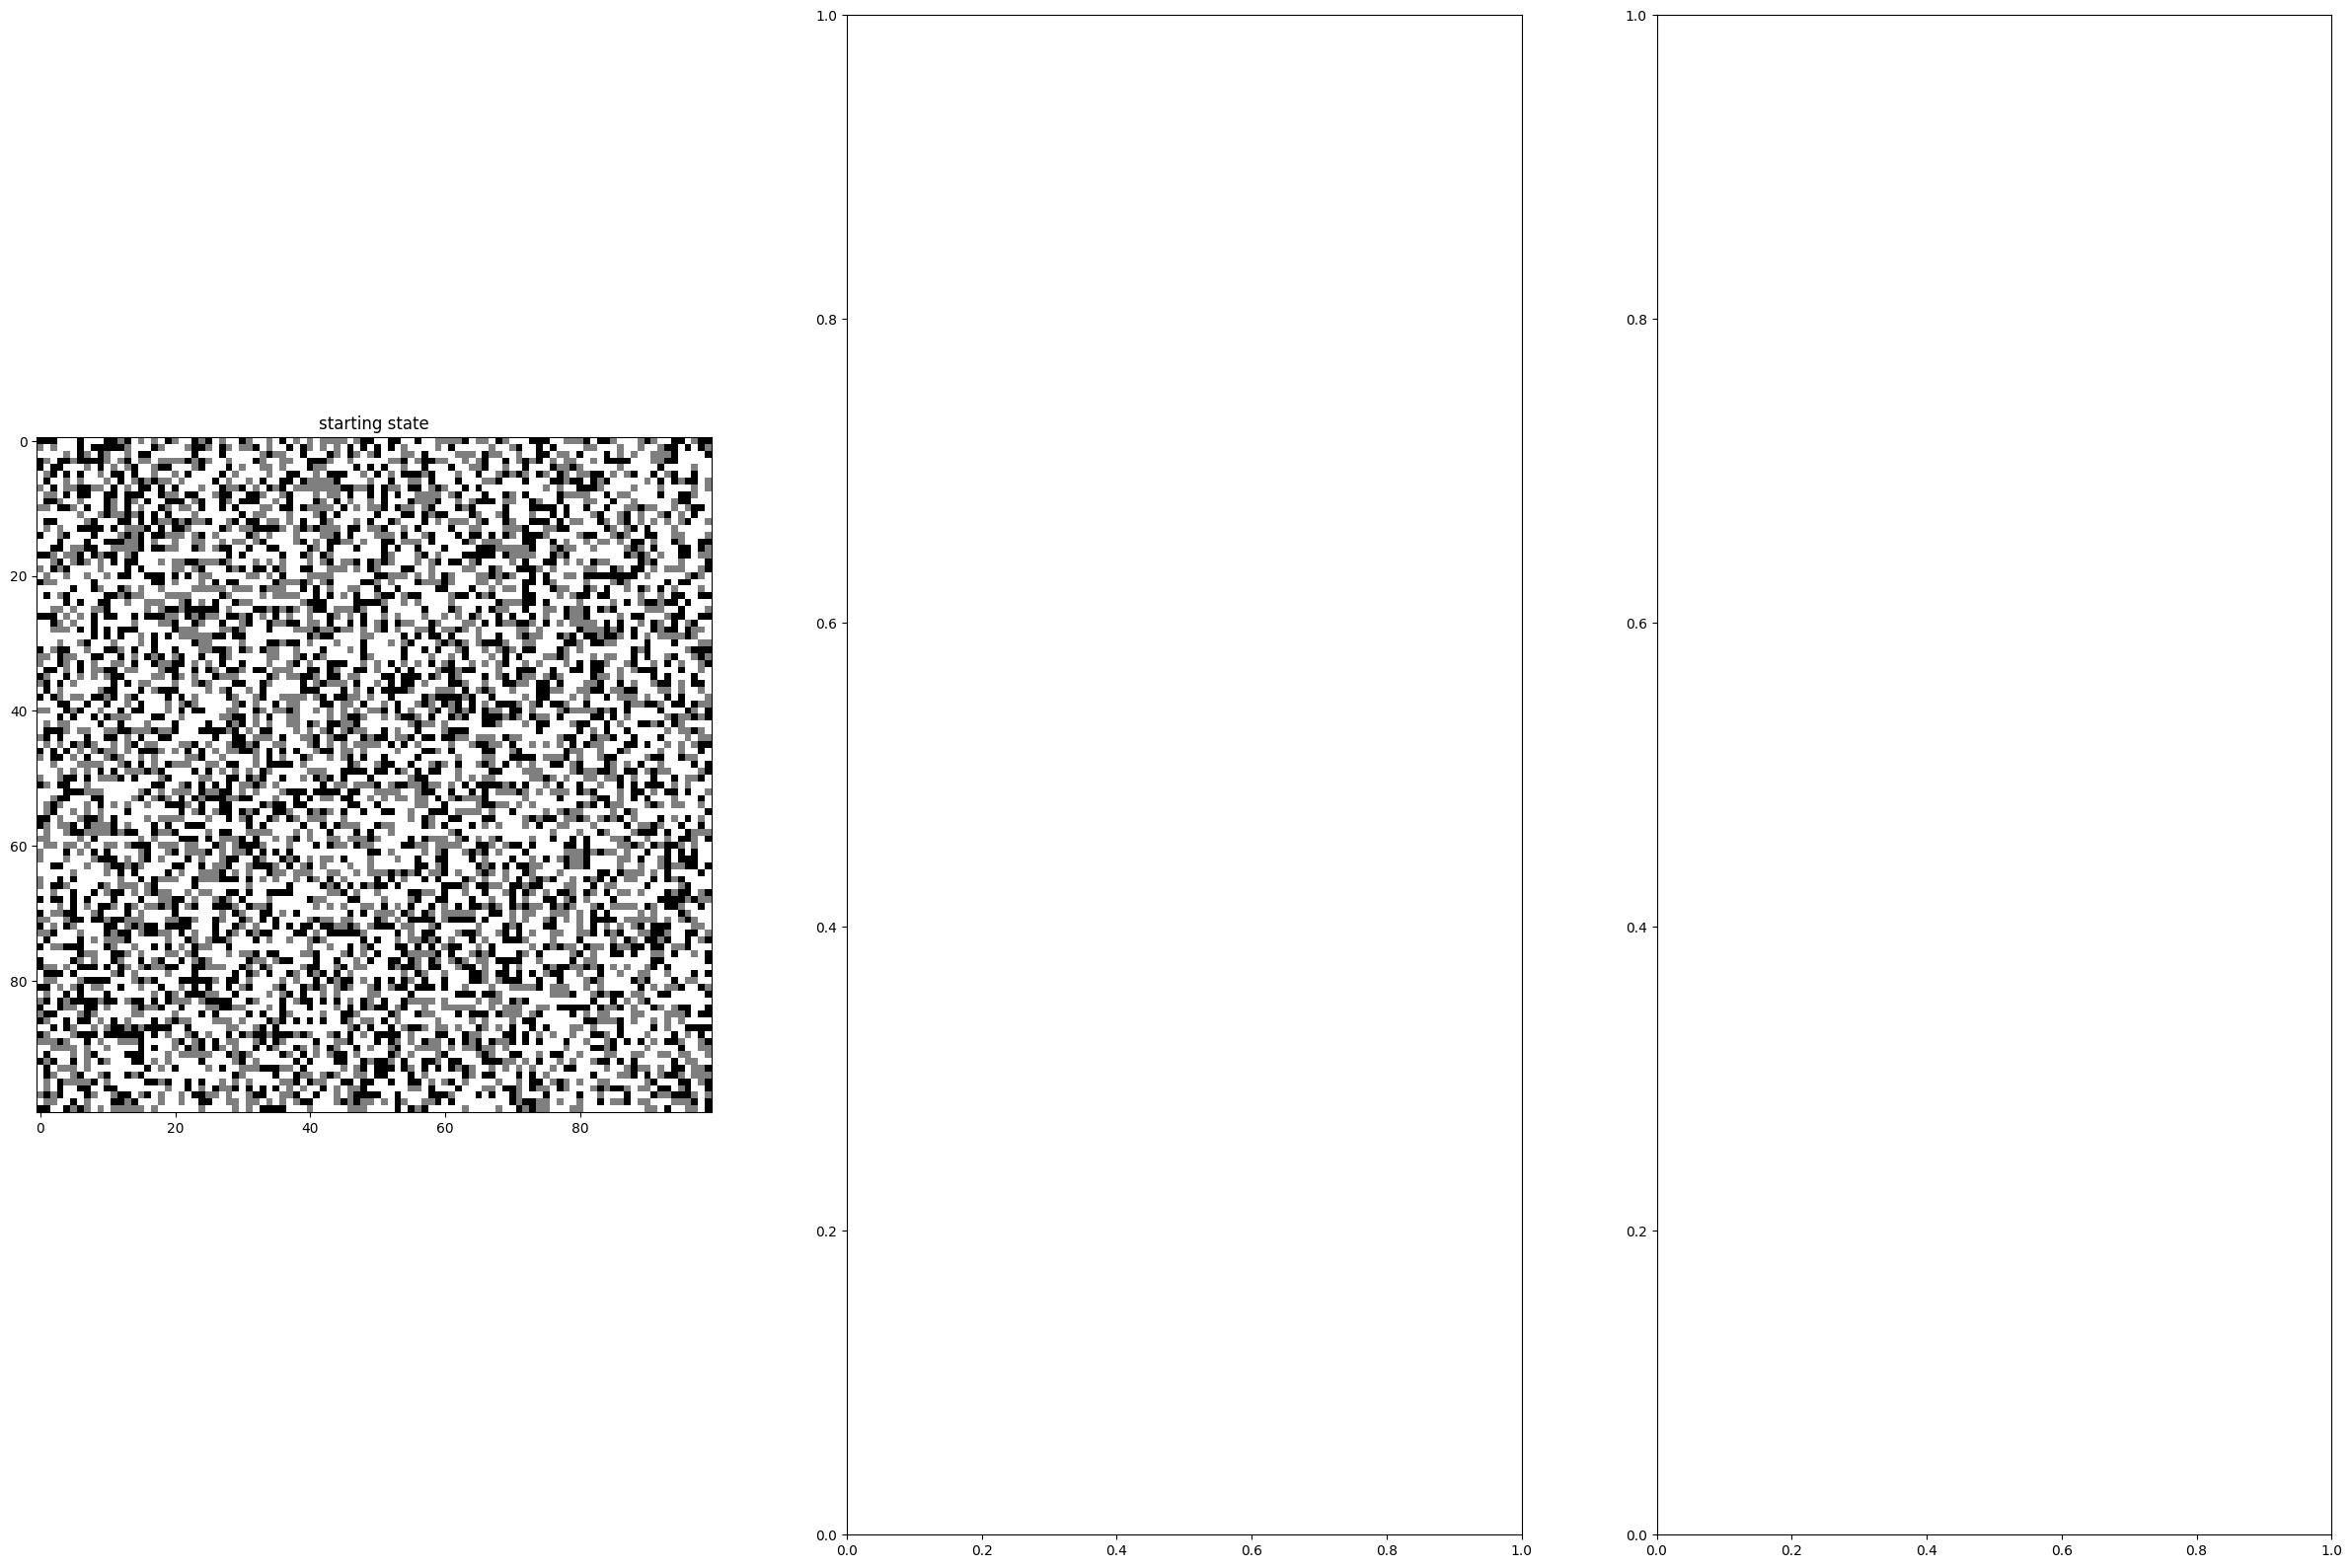

In [55]:
run_test(*test_cases[6])

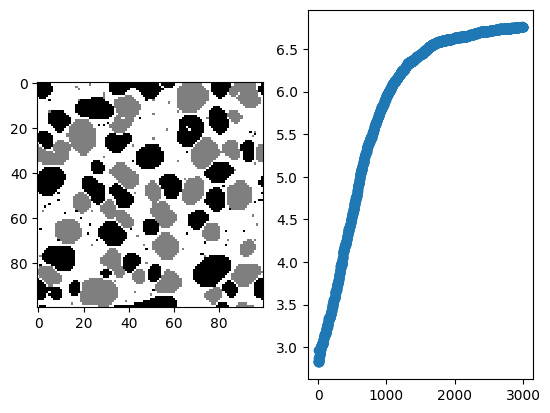

In [ ]:
run_test(*test_cases[7])

In [ ]:
run_test(*test_cases[8])

In [ ]:
run_test(*test_cases[9])

In [ ]:
run_test(*test_cases[10])

In [ ]:
run_test(*test_cases[11])